# Principal Component Analysis (PCA) with Python

Hi Guys 😀 Welcome to Tirendaz Academy
In this notebook, I going to talk about principal component analysis (PCA) using a real-world dataset.

## Loading The Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wine.data", header = None)

In [3]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [4]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

## Preprocessing The Dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[:, 1:].values

In [8]:
y = df.iloc[:,0].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [9]:
df["Class label"].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## PCA

In [14]:
import numpy as np

In [15]:
cov_mat = np.cov(X_train_std.T)

In [16]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [17]:
eigen_vals

array([4.74306501, 2.6586004 , 1.56143451, 0.8894226 , 0.81967284,
       0.56165199, 0.48203619, 0.09956339, 0.35861154, 0.16926049,
       0.21363015, 0.25638834, 0.28514741])

In [18]:
eigen_vecs.shape

(13, 13)

In [19]:
tot = sum(eigen_vals)

In [20]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.dpi":300})

<BarContainer object of 13 artists>

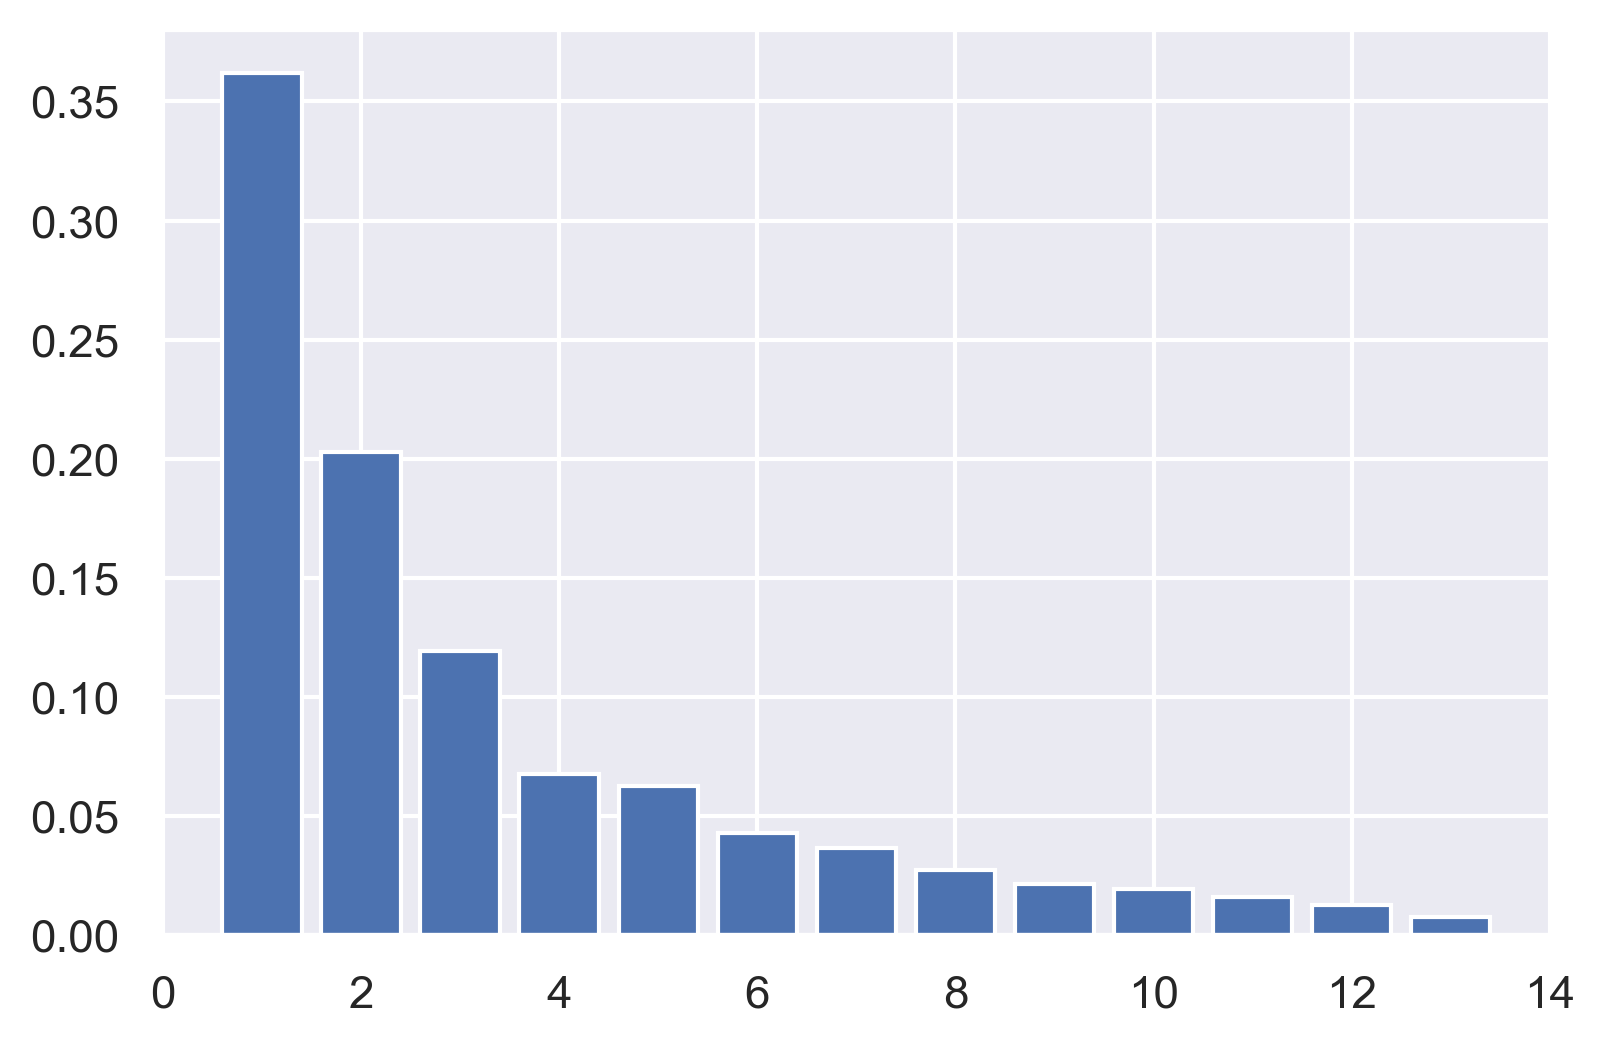

In [23]:
plt.bar(range(1,14), var_exp, align ="center")

## PCA with Scikit-Learn

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)

In [26]:
X_train_pca = pca.fit_transform(X_train_std)

In [27]:
X_test_pca = pca.transform(X_test_std)

In [28]:
pca.explained_variance_

array([4.74306501, 2.6586004 ])

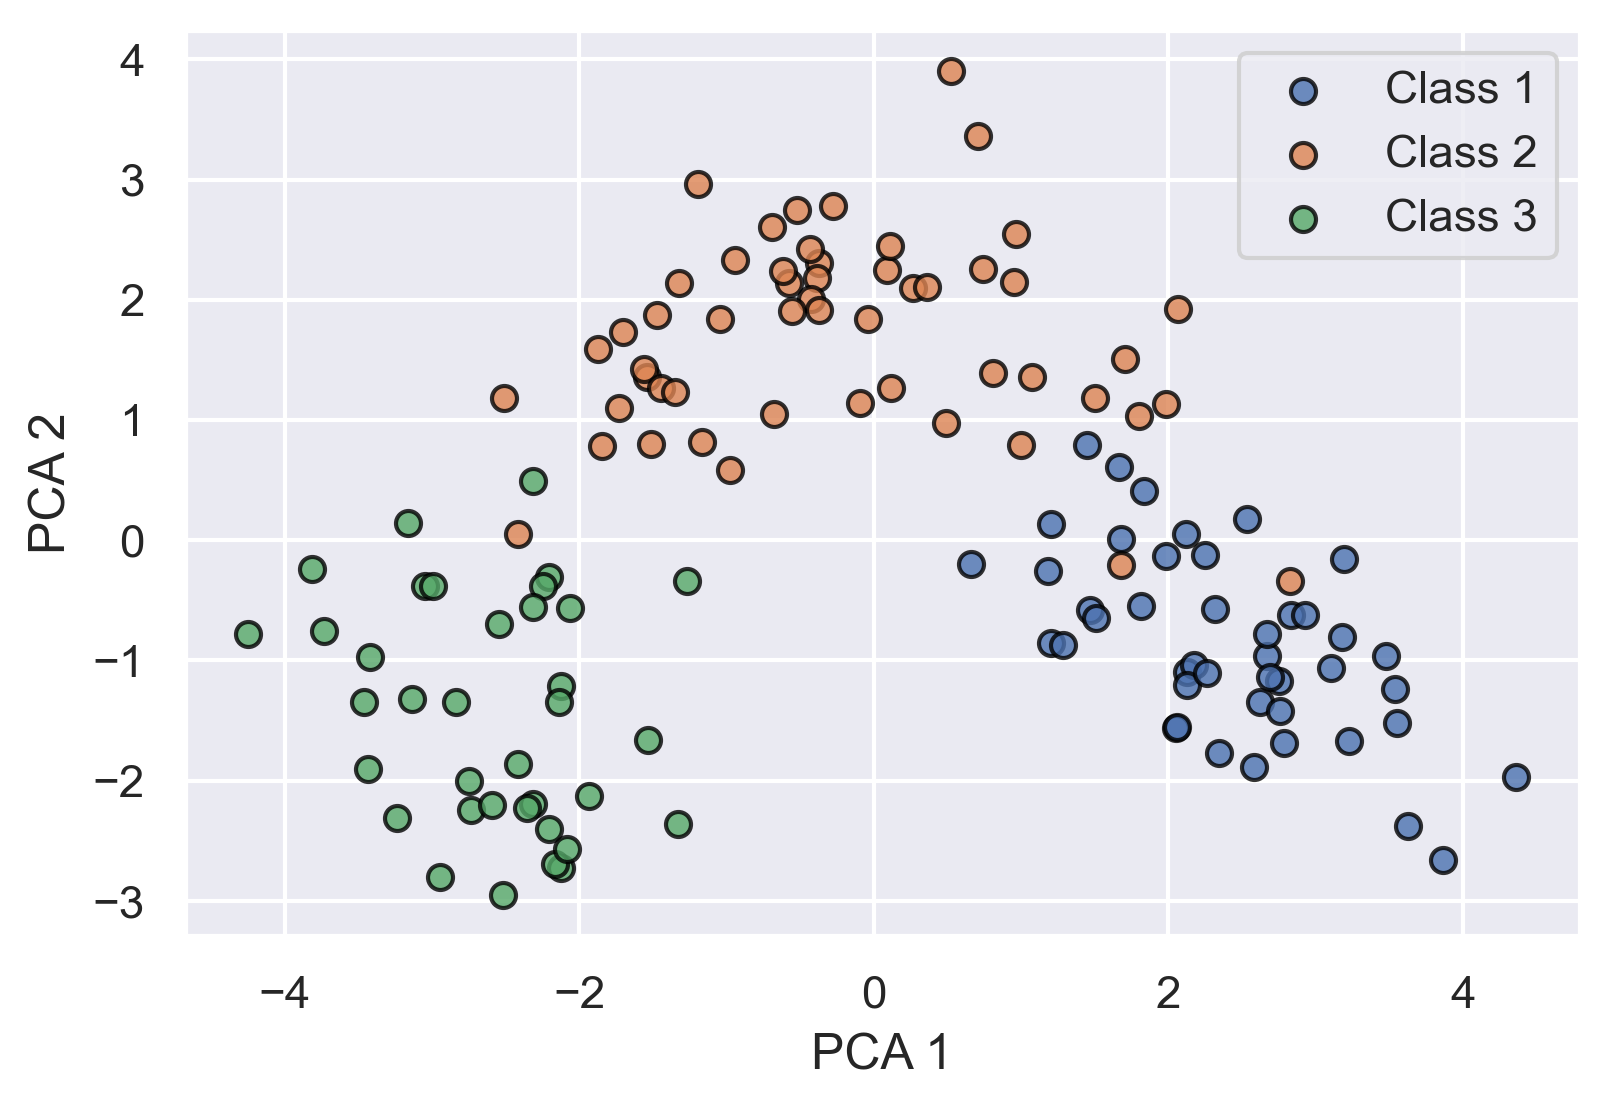

In [29]:
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(x = X_train_pca[y_train == cl, 0],
                y = X_train_pca[y_train == cl, 1],
                alpha = 0.8,
                label = f"Class {cl}",
                edgecolors="black")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

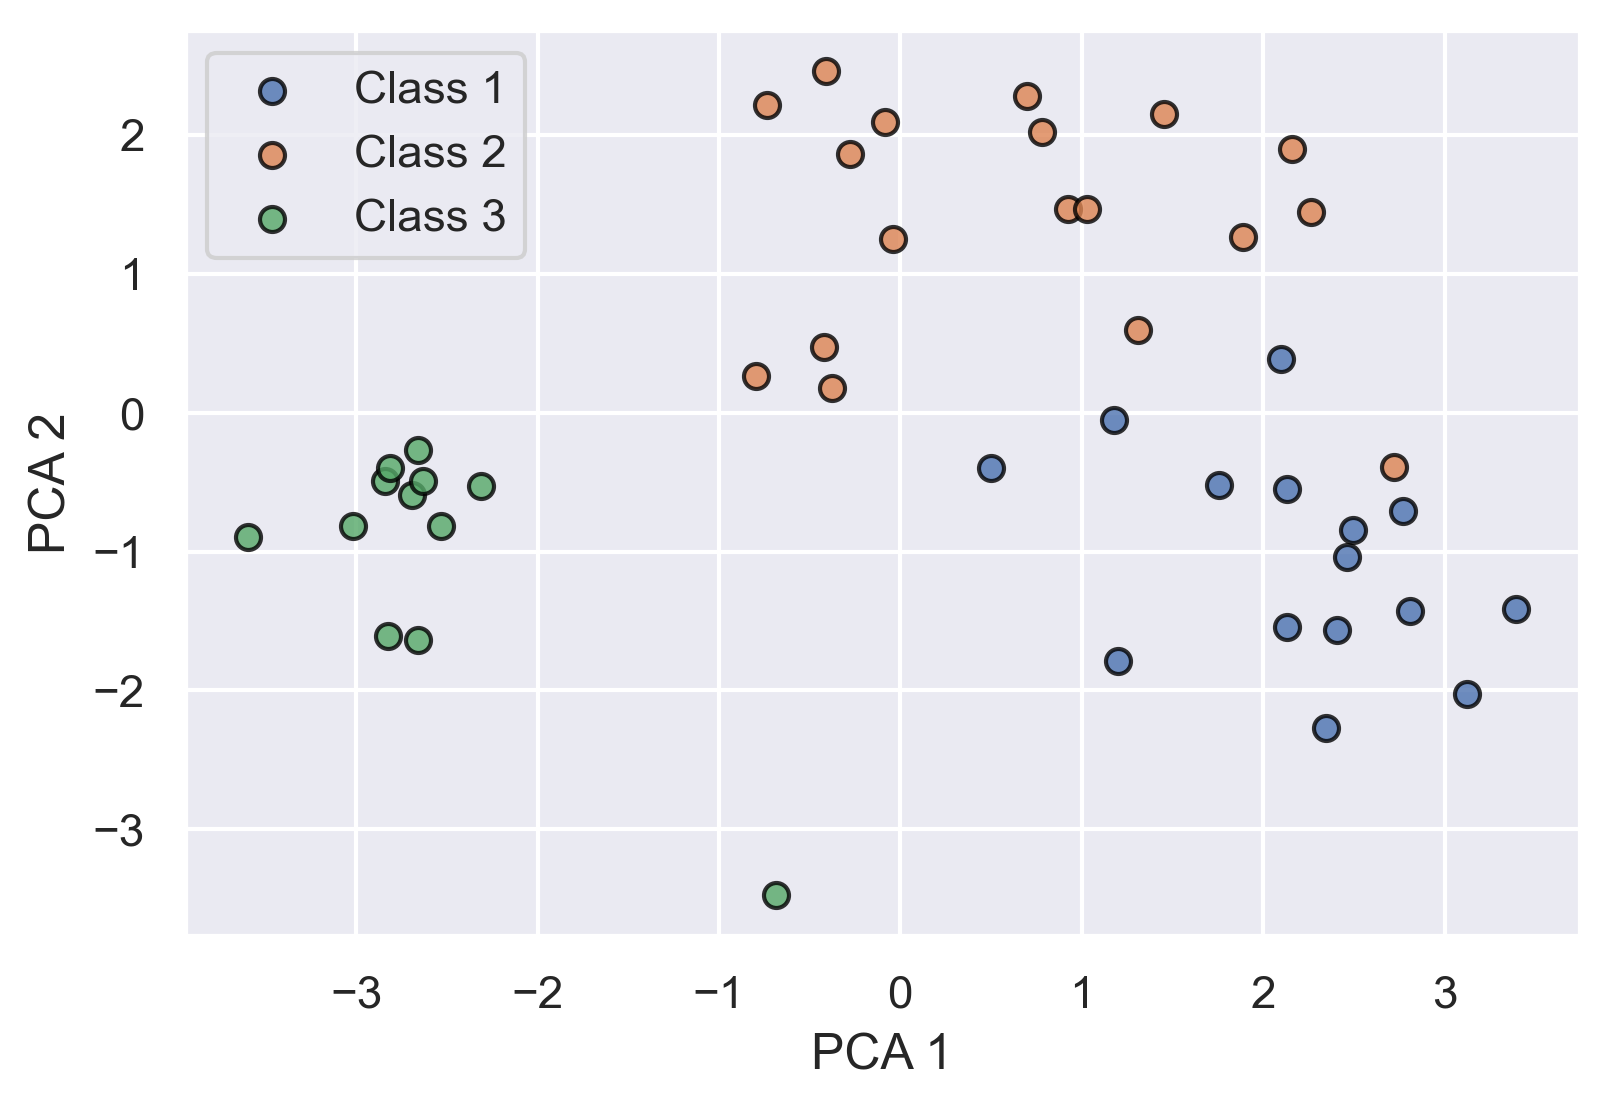

In [30]:
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x = X_test_pca[y_test == cl, 0],
                y = X_test_pca[y_test == cl, 1],
                alpha = 0.8,
                label = f"Class {cl}",
                edgecolors="black")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

Don't forget to follow us on [YouTube](https://youtube.com/c/tirendazacademy) | [Twitter](https://twitter.com/tirendazacademy) | [GitHub](https://github.com/tirendazacademy) | [Medium](https://tirendazacademy.medium.com) | [Linkedin](https://linkedin.com/in/tirendaz-academy) 